In [1]:
#Initialise Modules
import matplotlib.pyplot as plt
import pydicom
import os

In [17]:
mydir = os.getcwd()
myfolder = 'image'
folderpath = os.path.join(mydir,myfolder)
myfile = os.listdir(folderpath)
filename = myfile[0]
filepath = os.path.join(folderpath,filename)

dataset = pydicom.dcmread(filepath)
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name

print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)


Filename.........: 1-01.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.4

Patient's name...: ACRIN-FMISO-Brain-001, 
Patient id.......: ACRIN-FMISO-Brain-001
Modality.........: MR
Study Date.......: 19620930


Image size.......: 448 x 448, 401408 bytes
Pixel spacing....: [0.55803573131561, 0.55803573131561]
Slice location...: 0


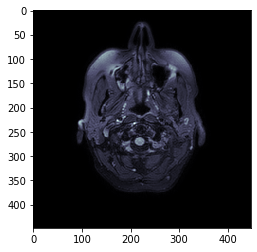

In [18]:
if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()